In [1]:
# by Terry Zhang in Mystic coders

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nasadata = pd.read_csv('current_month_nasa.csv', low_memory=False)
yourdata = pd.read_csv('current_month_yoursolarpanels.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [4]:
nasadata['DY'] = pd.to_numeric(nasadata['DY'])
nasadata['ALLSKY_SFC_SW_DWN'] = pd.to_numeric(nasadata['ALLSKY_SFC_SW_DWN'])
nasadata['ALLSKY_NKT'] = pd.to_numeric(nasadata['ALLSKY_NKT'])
yourdata['DY'] = pd.to_numeric(yourdata['DY'])
yourdata['mean_kilowatt_per_hour'] = pd.to_numeric(yourdata['mean_kilowatt_per_hour'])

In [5]:
sub1 = nasadata[['DY', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_NKT']].replace(-999, np.nan)
sub2 = yourdata[['DY', 'mean_kilowatt_per_hour']].replace(-999, np.nan)
sub1 = sub1.dropna(subset=['ALLSKY_SFC_SW_DWN'])
sub2 = sub2.dropna(subset=['mean_kilowatt_per_hour'])
sub1.set_index('DY', inplace=True)
sub2.set_index('DY', inplace=True)

In [6]:
sub2['kilowatt_per_day'] = (sub2['mean_kilowatt_per_hour']*24)
#24 hours of sunlight

Text(0.5, 1.0, 'Line Plot for solar irradiance')

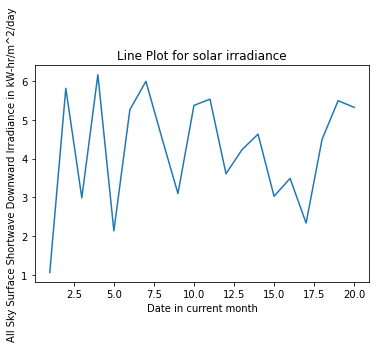

In [7]:
%matplotlib inline
sns.lineplot(data=sub1, x="DY", y="ALLSKY_SFC_SW_DWN")
plt.xlabel('Date in current month')
plt.ylabel('All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day')
plt.title('Line Plot for solar irradiance')

In [8]:
monthly_mean = sub1['ALLSKY_SFC_SW_DWN'].mean()
monthly_max = sub1['ALLSKY_SFC_SW_DWN'].max()
monthly_min = sub1['ALLSKY_SFC_SW_DWN'].min()
monthly_total = sub1['ALLSKY_SFC_SW_DWN'].sum()

In [9]:
monthly_mean_your = sub2['kilowatt_per_day'].mean()
monthly_max_your = sub2['kilowatt_per_day'].max()
monthly_min_your = sub2['kilowatt_per_day'].min()
monthly_total_your = sub2['kilowatt_per_day'].sum()

Text(0.5, 1.0, 'Combined Time Series Plot')

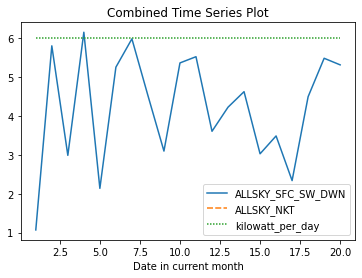

In [10]:
sub3 = pd.merge(sub1,sub2,on='DY', how='left')
sub3 = sub3.drop(['mean_kilowatt_per_hour'], axis=1)
%matplotlib inline
sns.lineplot(data=sub3)
plt.xlabel('Date in current month')
plt.title('Combined Time Series Plot')

In [11]:
print('For your location:')
print(f'The mean of All Sky Surface Shortwave Downward Irradiance in the month is {monthly_mean:.2f} kW-hr/m^2/day')
print(f'The maxmium of All Sky Surface Shortwave Downward Irradiance in the month is {monthly_max:.2f} kW-hr/m^2/day')
print(f'The minimum of All Sky Surface Shortwave Downward Irradiance in the month is {monthly_min:.2f} kW-hr/m^2/day')
print(f'The total of All Sky Surface Shortwave Downward Irradiance in the month is {monthly_total:.2f} kW-hr/m^2/day')

For your location:
The mean of All Sky Surface Shortwave Downward Irradiance in the month is 4.23 kW-hr/m^2/day
The maxmium of All Sky Surface Shortwave Downward Irradiance in the month is 6.16 kW-hr/m^2/day
The minimum of All Sky Surface Shortwave Downward Irradiance in the month is 1.07 kW-hr/m^2/day
The total of All Sky Surface Shortwave Downward Irradiance in the month is 84.59 kW-hr/m^2/day


In [12]:
print('For your solar system:')
print(f'The mean of kilowatt per day of your solar panels in the month is {monthly_mean_your:.2f} kW-day')
print(f'The maxmium of kilowatt per day of your solar panels in the month is {monthly_max_your:.2f} kW-day')
print(f'The minimum of kilowatt per day of your solar panels in the month is {monthly_min_your:.2f} kW-day')
print(f'The total of kilowatt per day of your solar panels in the month is {monthly_total_your:.2f} kW-day')

For your solar system:
The mean of kilowatt per day of your solar panels in the month is 6.00 kW-day
The maxmium of kilowatt per day of your solar panels in the month is 6.00 kW-day
The minimum of kilowatt per day of your solar panels in the month is 6.00 kW-day
The total of kilowatt per day of your solar panels in the month is 180.00 kW-day
